In [1]:
import sys 
import warnings
warnings.filterwarnings('ignore')
sys.path.append('/Users/lei/home/studyhall/modeling-rsa/lib') 
 
import pickle 
import numpy as np 

import torch 
from torch.utils.data import DataLoader 
 
from ffnn import FFNN 

In [2]:
device = torch.device("mps")
print("The model will be running on", device, "device")

The model will be running on mps device


In [3]:
with open('../pk_files/dataset.pkl', 'rb') as f:
    (data_train, data_val) = pickle.load(f)

In [4]:
print("shape of any feature sample in data_train: {}".format(np.shape(data_train[0][0]))) 
print("shape of any label sample in data_train: {}".format(np.shape(data_train[0][1]))) 
print("shape of any feature sample in data_val: {}".format(np.shape(data_val[0][0]))) 
print("shape of any label sample in data_val: {}".format(np.shape(data_val[0][1]))) 

shape of any feature sample in data_train: torch.Size([8])
shape of any label sample in data_train: torch.Size([3])
shape of any feature sample in data_val: torch.Size([8])
shape of any label sample in data_val: torch.Size([3])


In [5]:
loader_train = DataLoader(data_train, batch_size=1024, num_workers=4, shuffle=True) 
loader_val = DataLoader(data_val, batch_size=1024, num_workers=4, shuffle=True) 
 
net = FFNN(device)
net = net.to(net.device) 

In [6]:
lr = 1e-4
num_epochs = 50 

In [7]:
net.fit(num_epochs, lr, loader_train, loader_val) 

 18%|█▊        | 9/50 [06:53<31:22, 45.90s/it]

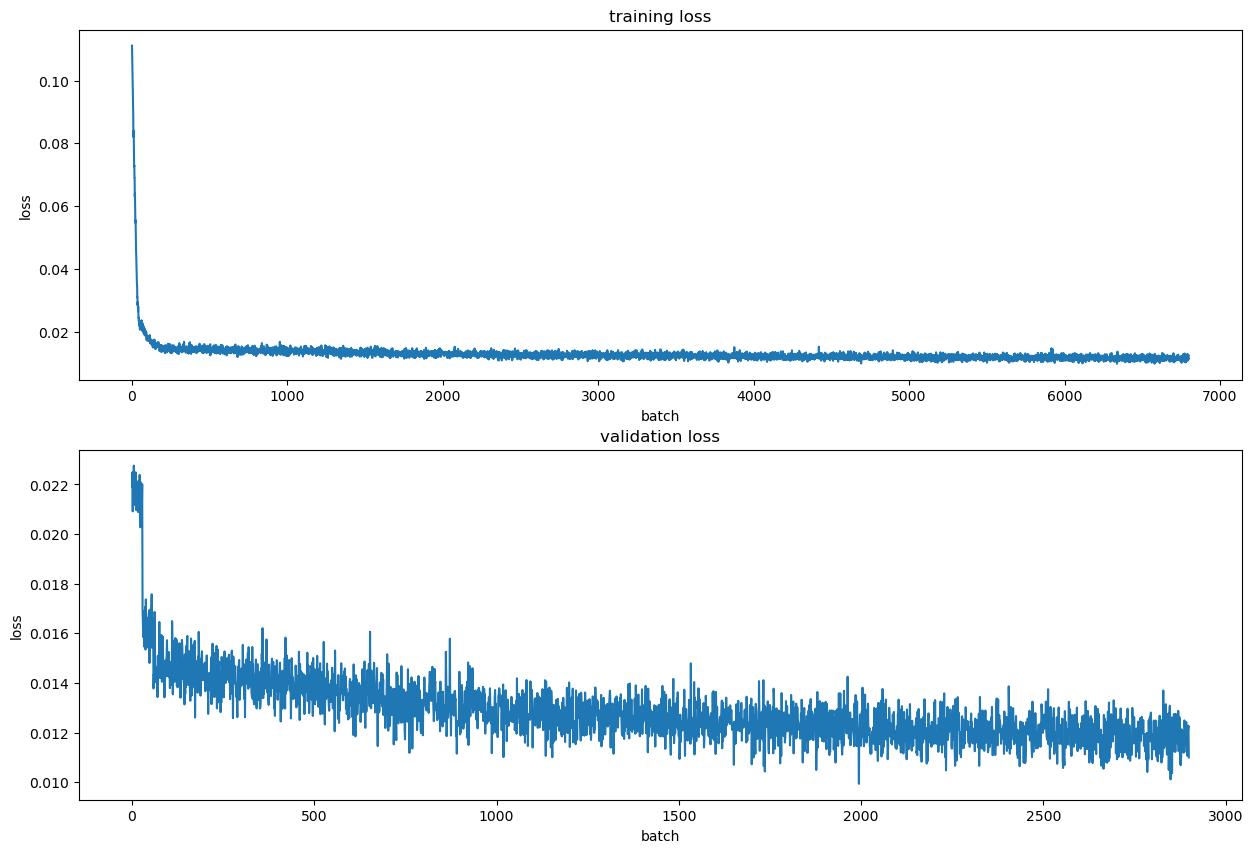

In [ ]:
net.evaluate()

In [12]:
torch.save(net.state_dict(), '../models/pt_ffnn_300e_1e-4lr_checkpoint.pt')